# Coding Lab 3
## Stellar Evolution
### ASTR-4301, Prof. Faus
### **Due 2024 March 29, Start of Class**

Send to michael.fausnaugh@ttu.edu, with your name in the filename.

At this point, you have enough python to explore various data sets. We will look at some Stellar Models, this time thinking about how they change in time.

**Full Effort:** To receive a check, you need to demonstrate full effort. You should run your code in every cell (`Shift+Enter`). If the code raises an error, you should try to debug it. 

If you try to debug things for 2 or 3 hours but can't get it to work, make a note of where you stopped with a comment or print function in the cell. Explain in one or two sentences what the error or problem that you are seeing is and what confusion(s) it is causing you.

If you don't give an explanation of why there are errors in your code cells or why you did not complete the notebook, you will receive a check-minus.

A check-plus is worth extra credit---one check-plus balances a check-minus. So a check-plus gives you an extra 1.5 percentage points on your final grade. If you want to aim for extra-credit, you have until Friday (March 29) at 10am to work on the coding lab. It is worth saying that I will help you with the coding lab if you bring it to office hours or make an appointment.

## Time-dependent Stellar Models

The models that we looked at in the last coding lab (from madStar: http://user.astro.wisc.edu/~townsend/static.php?ref=mesa-web-submit) solve time-dependent stellar structure equations.  Summaries of the time steps are given with each model.  The following code cell will pull the data files and load the models into several nd-arrays.  

**These models are run from the protostar collapse phase through the end of core-hydrogen burning on the Main Sequence.**

In [ ]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

#02182425344 M = 1Msun
#02182425346 M = 10Msun
#02182425344 M =  0.5 Msun
#03212426484 M = 1.3 Msun
#03212426486 M = 5Msun
#03212426488 M = 3Msun

!wget https://raw.githubusercontent.com/mmfausnaugh/astr-4301-coding-lab-3/main/MESA-Web_Job_02182425344.zip
!wget https://raw.githubusercontent.com/mmfausnaugh/astr-4301-coding-lab-3/main/MESA-Web_Job_02182425346.zip
!wget https://raw.githubusercontent.com/mmfausnaugh/astr-4301-coding-lab-3/main/MESA-Web_Job_02182425348.zip
!wget https://raw.githubusercontent.com/mmfausnaugh/astr-4301-coding-lab-3/main/MESA-Web_Job_03212426484.zip
!wget https://raw.githubusercontent.com/mmfausnaugh/astr-4301-coding-lab-3/main/MESA-Web_Job_03212426486.zip
!wget https://raw.githubusercontent.com/mmfausnaugh/astr-4301-coding-lab-3/main/MESA-Web_Job_03212426488.zip
    
!unzip MESA-Web_Job_02182425344.zip
!unzip MESA-Web_Job_02182425346.zip
!unzip MESA-Web_Job_02182425348.zip
!unzip MESA-Web_Job_03212426484.zip
!unzip MESA-Web_Job_03212426486.zip
!unzip MESA-Web_Job_03212426488.zip

d_10Msun    = np.genfromtxt('MESA-Web_Job_02182425346/trimmed_history.data',names=True,skip_header=5)
d_5Msun     = np.genfromtxt('MESA-Web_Job_03212426486/trimmed_history.data',names=True,skip_header=5)
d_3Msun     = np.genfromtxt('MESA-Web_Job_03212426488/trimmed_history.data',names=True,skip_header=5)
d_1dot3Msun = np.genfromtxt('MESA-Web_Job_03212426484/trimmed_history.data',names=True,skip_header=5)
d_1Msun     = np.genfromtxt('MESA-Web_Job_02182425344/trimmed_history.data',names=True,skip_header=5)
d_0dot5Msun = np.genfromtxt('MESA-Web_Job_02182425348/trimmed_history.data',names=True,skip_header=5)


--2024-03-21 20:18:28--  https://raw.githubusercontent.com/mmfausnaugh/astr-4301-coding-lab-3/main/MESA-Web_Job_02182425344.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8000::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1894063 (1.8M) [application/zip]
Saving to: ‘MESA-Web_Job_02182425344.zip.3’

MESA-Web_Job_021824 100%[===================>]   1.81M  2.54MB/s    in 0.7s    

2024-03-21 20:18:30 (2.54 MB/s) - ‘MESA-Web_Job_02182425344.zip.3’ saved [1894063/1894063]

--2024-03-21 20:18:30--  https://raw.githubusercontent.com/mmfausnaugh/astr-4301-coding-lab-3/main/MESA-Web_Job_02182425346.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8000::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.

We have data in six ndarrays, for models with solar masses equal to 10, 5, 3, 1.3, 1, and 0.5 Msun.

Each model is like a 2D table.  The rows are time steps, and are labeled by the age of the star at that time. The columns are varias data values---things like log luminosity, log Teff, central density, log Radius, and others are available to you.  

The `names=True` keyword is worth special attention. This allows us to access the data by name, instead of by index.  

Run the code cell below, which will print the data names available to you, and the first 10 entries of the `log_L` column.  Then, write your own code that prints the luminosity next to the age at each time stamp, for the 1Msun model.

In [11]:
print(d_1Msun.dtype)
print('First 10 entries of the 1 solar mass model for log_L',d_1Msun['log_L'][0:10])

[('model_number', '<f8'), ('star_age', '<f8'), ('star_mass', '<f8'), ('log_L', '<f8'), ('log_R', '<f8'), ('log_Teff', '<f8'), ('log_center_T', '<f8'), ('log_center_Rho', '<f8'), ('log_center_P', '<f8'), ('center_h1', '<f8'), ('center_he3', '<f8'), ('center_he4', '<f8'), ('center_c12', '<f8'), ('center_n14', '<f8'), ('center_o16', '<f8'), ('center_ne20', '<f8'), ('center_mg24', '<f8'), ('center_si28', '<f8'), ('center_s32', '<f8'), ('center_ar36', '<f8'), ('center_ca40', '<f8'), ('center_ti44', '<f8'), ('center_cr48', '<f8'), ('center_fe52', '<f8'), ('center_fe54', '<f8'), ('center_fe56', '<f8'), ('center_ni56', '<f8'), ('center_degeneracy', '<f8'), ('center_ye', '<f8'), ('center_entropy', '<f8'), ('compactness_parameter', '<f8'), ('dynamic_timescale', '<f8'), ('kh_timescale', '<f8'), ('nuc_timescale', '<f8'), ('pp', '<f8'), ('cno', '<f8'), ('tri_alfa', '<f8'), ('log_LH', '<f8'), ('log_LHe', '<f8'), ('log_LZ', '<f8'), ('log_Lneu', '<f8'), ('he_core_mass', '<f8'), ('c_core_mass', '<f8'),

In [ ]:
#In this cell, write code that prints the star's age and log of luminosity. Use the 





Our plots are usually in 2D, but in this coding lab, we want to see how stars move through the HR Diagram and central density-central temperature plane over time.  

We can encode the stellar age as a 3rd dimension. Python will let you make 3D plots, but we always end up looking at 3D plots as a projection, and this can lead to confusion.

A better idea is to encode the time as a color---this is an unambiguous way of showing a 3rd dimension on a 2D plot.

The easiest way of doing this in `matplotlib.pyplot` is a function called `scatter`, which makes a scatter plot and has lots of formatting options. The following cell will plot the 1 Msun model in the HR diagram, color-coded by stellar age. The keyword `c` stands for color. Note that you have options for different color scales: https://matplotlib.org/stable/users/explain/colors/colormaps.html.

`pyplot` can also make a colorbar, which is added in the cell below.

I also added a function that will reverse the xaxis, which makes it look like a real HR diagram.

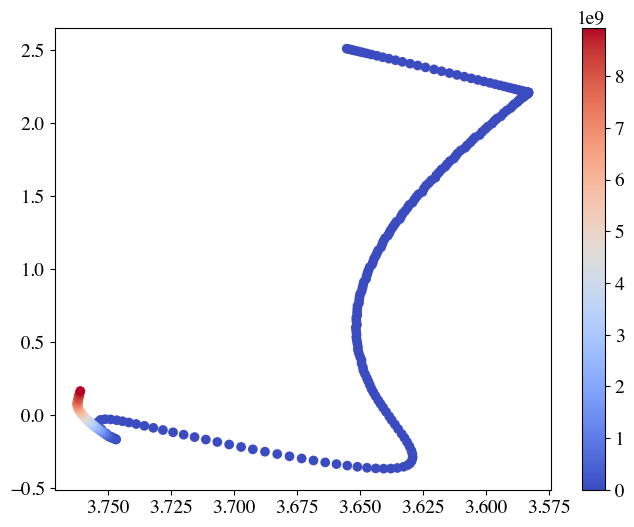

In [17]:
def format_HR():
    #this function will reverse the X-axis
    l,h = plt.gca().get_xlim()
    plt.xlim([h,l])

plt.scatter(d_1Msun['log_Teff'],
            d_1Msun['log_L'],
            c=d_1Msun['star_age'])
plt.colorbar()
format_HR()

## Discussion Questions
1) Where is the Hayashi track in this diagram?
2) Where does the star spend most of its life in the HR diagram?
3) How long does the star stay on the main sequence?
4) How else might you find how long the star stays on the main sequence, in this model?

# Questions

1) For each stellar model, plot its track in the HR diagram, using a color bar to encode time. Plot all of the tracks in a single figure.


In [ ]:
# Wrote your code here that plots all of the stellar models in the HR diagram


2) Give the range temperatures of the Hayashi track based on these six models.


In [ ]:
#Type your answer in this cell, using either comments or print functions\\




3) The column 'pp' and 'cno' gives the luminosity of each model from the pp-chain and CNO cycle. 

For the 1.3Msun solar model and the 1.0Msun solar model, make a plot that compares the luminosity for the pp-chain and CNO cycle.


In [ ]:
#Write your plotting code here.


4)  Based on these plots what age does the each stellar model start hydrogen burning?  (Hint: you may want to plot the log of the stellar age, or change the x-axis to a log scale in the plot from question 3.)

In [ ]:
#Type your answer in this cell, using either comments or print functions




5) For the 0.5Msun solar model, make a plot of the luminosity for the pp-chain and CNO cycle.


In [ ]:
#Write your plotting code here.


6) How much longer does a 0.5Msun star stay on the main sequence than the 1.0Msun star?


In [ ]:
#Type your answer in this cell, using either comments or print functions


7) How long does a 10Msun star stay on the main sequence?

In [ ]:
#Type your answer in this cell, using either comments or print functions


8) For each stellar model, plot its track in the central density---central temperature plane, using a color bar to encode time. You may use one figure, or multiple figures, if you prefer


In [ ]:
#Write your plotting code here.


9) What is the slope of the evolution of the star in the central-density central temperature plane?


In [ ]:
#Type your answer in this cell, using either comments or print functions
